# Examen final Probabilidad y Estadística para Inteligencia Artificial

Siguiendo con la historia de Don Francisco, con el tiempo y gracias a los análisis de Matı́as, el pequeño comerciante de
barrio cuenta hoy con 5 supermercados: ’Santa Ana’, ’La Floresta’, ’Los Cedros’, ’Palermo’ y ’Córdoba’.
También Matı́as ha avanzado en la Especialización en Inteligencia Artificial. Un dı́a Don Francisco le plantea algunas
inquietudes adicionales:
1. Don Francisco quiere entender mejor las ventas por mes del supermercado ’Santa Ana’.
2. Más aún, Don Francisco no sabe si puede estar seguro de que las ventas son las mismas en todos los supermercados o si
hay alguno que se comporte mejor que los demás, y si alguna de las tiendas necesita más atención porque sus ventas sean
peores que las de las otras.
3. Don Francisco tiene 5 clientes a los que les ha vendido mercancı́as a crédito y, de ellos, 1 están en mora con el pago prometido.
Matı́as, teniendo en cuenta la información disponible, considera que puede modelar el porcentaje p de morosidad según una
distribución B(1, 2). Para determinar los parámetros α y β, decide usar inferencia bayesiana. Con esto, pretende explicarle
a Don Francisco, cómo será el comportamiento de pago de sus clientes a crédito.

In [22]:
import pandas as pd

data_dict = {
    "Santa Ana": "Datos_examen_final_17Co2024_Grupo9.xlsx - Santa Ana.csv",
    "Cordoba": "supermercado_cordoba.xlsx - corboda.csv",
    "La Floresta": "supermercado_la_floresta.xlsx - la_floresta.csv",
    "Los Cedros": "supermercado_los_cedros.xlsx - los_cedros.csv",
    "Palermo": "supermercado_palermo.xlsx - palermo.csv"
}

df_lst = []
for name, path in data_dict.items():
    df = pd.read_csv(path)
    if name != "Santa Ana":
        df["Ventas"] = pd.to_numeric(df["Ventas"].str.replace(",", "."))
        df["Fecha"] = pd.to_datetime(df["Fecha"], format="%d/%m/%Y")
    else:
        df["Fecha"] = pd.to_datetime(df["Fecha"], format="%m/%d/%Y")
    df.rename(columns={"Ventas": "Ventas " + name}, inplace=True)
    df.set_index("Fecha", inplace=True)
    df_lst.append(df)
df = pd.concat(df_lst, axis=1)
df.head()

,Ventas Santa Ana,Ventas Cordoba,Ventas La Floresta,Ventas Los Cedros,Ventas Palermo
Fecha,,,,,
2023-01-01,13915.65363,9436.599034,14528.04302,10039.64150,15363.29967
2023-01-02,16713.74951,15154.679380,15616.72012,14284.06338,14631.65363
2023-01-03,17415.85259,15532.275600,22447.34418,10592.77961,17576.45150
2023-01-04,19494.02393,14599.198780,20440.80662,15332.96389,17158.66839
2023-01-05,22818.79946,20701.013190,21053.45924,15360.58419,15260.22582


1. Determinen intervalos de confianza empı́ricos para el supermercado ’Santa Ana’ en cada mes, para signifi-
cancias del 95 % y el 99 %.

TypeError: distplot() got an unexpected keyword argument 'data'

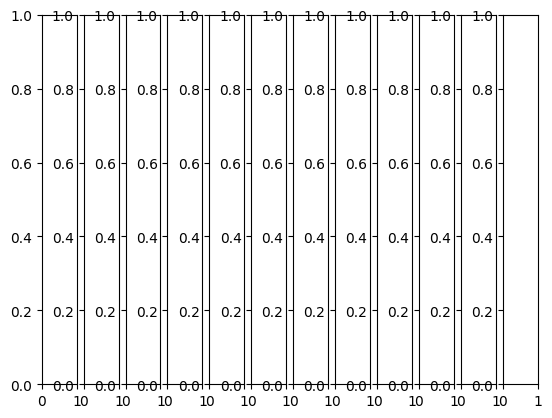

In [47]:
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

NUMBER_OF_MONTHS = 12

ci_empiric = {
    "month": [],
    "mean": [],
    "std_dev": [],
    "95%": [],
    "99.7%": []
}

df_by_month = []
df_santa_ana = df["Ventas Santa Ana"]

fig, axs = plt.subplots(nrows=1, ncols=NUMBER_OF_MONTHS)
for i in range(NUMBER_OF_MONTHS):
    month_data = df_santa_ana.iloc[df_santa_ana.index.month == i+1]
    ci_empiric["month"].append(calendar.month_name[i+1])
    month_mean = month_data.mean()
    month_std = month_data.std()
    ci_empiric["mean"].append(month_mean)
    ci_empiric["std_dev"].append(month_std)
    ci_empiric["95%"].append((month_mean - 2*month_std, month_mean + 2*month_std))
    ci_empiric["99.7%"].append((month_mean - 3*month_std, month_mean + 3*month_std))
    sns.kdeplot(data=month_data, ax=axs[i])
    axs[i].set_xlabel("Histograma " + calendar.month_name[i+1])
    df_by_month.append(month_data)

ci_empiric_df = pd.DataFrame.from_dict(ci_empiric)
display(ci_empiric_df)
fig.set_size_inches(40, 5)

2. Realicen pruebas ANOVA para determinar si las ventas esperadas de todas las tiendas son iguales o no,
con significancia del 95

In [25]:
from scipy import stats

stats.f_oneway(*df_by_month)

F_onewayResult(statistic=np.float64(12.05163033219513), pvalue=np.float64(2.9749262098506266e-19))

3. Identifiquen la tienda con mayor promedio de ventas y la tienda con menor promedio de ventas y realicen
una prueba de hipótesis para determinar si la diferencia entre ellas es distinta de cero o no.

In [42]:
df.describe()

,Ventas Santa Ana,Ventas Cordoba,Ventas La Floresta,Ventas Los Cedros,Ventas Palermo
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,20990.659056,17900.271075,21713.716026,18068.391082,20787.278462
std,3080.749475,2989.198032,3063.659636,3068.290166,2908.004697
min,11333.434400,9436.599034,12494.913740,10039.641500,11439.713420
25%,18759.655090,15935.841870,19667.310080,15862.198550,18908.726290
50%,21248.570810,18126.591290,22016.190500,18141.253410,20952.996530
75%,23010.314330,20085.310130,23748.501730,20342.445370,22908.781810
max,28860.143320,24259.714110,28467.553380,25496.299150,28256.625700


In [45]:
import numpy as np
from scipy import stats

mean_sales = df.mean()
max_sales = mean_sales.idxmax()
min_sales = mean_sales.idxmin()
print("Max. sales:", max_sales)
print("Min. sales:", min_sales)

max_min_mean_sales = np.concatenate((df[max_sales].to_numpy(), df[min_sales].to_numpy()))

res = stats.ttest_1samp(max_min_mean_sales, df.mean(axis=None))
print(res)
print("La media de las muestras se desvía",  res.statistic, "de la hipotesis nula.")

Max. sales: Ventas La Floresta
Min. sales: Ventas Cordoba
TtestResult(statistic=np.float64(-0.6427218874234027), pvalue=np.float64(0.5206066629642504), df=np.int64(729))
La media de las muestras se desvía -0.6427218874234027 de la hipotesis nula.
